In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
df = pd.read_excel('../../data/processed/masterdbForNLP.xlsx')
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.columns

Index(['Survey N', 'Question N', 'commentId', 'dataSource',
       'NumberFromRawData', 'comment', 'rating', 'q1p1', 'q1p2', 'q2p1',
       'q2p2', 'q3p1', 'q3p2', 'q1p1T', 'q1p2T', 'q2p1T', 'q2p2T', 'q3p1T',
       'q3p2T', 'P1QualScore', 'P2QualScore', 'Q1Match', 'Q2Match', 'Q3Match',
       'perfectMatch', 'RobMacCommentModified', 'RobMacQ1', 'RobMacQ2',
       'RobMacQ3', 'RobMacQualScore', 'Q1', 'Q2', 'Q3', 'QUAL', 'GenderRes',
       'GenderFac', 'Type', 'ObserverType', 'EPA', 'PGY'],
      dtype='object')

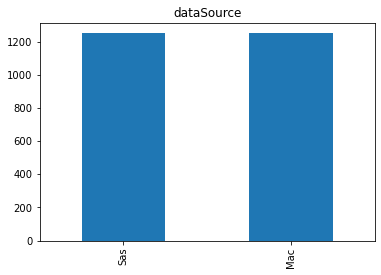

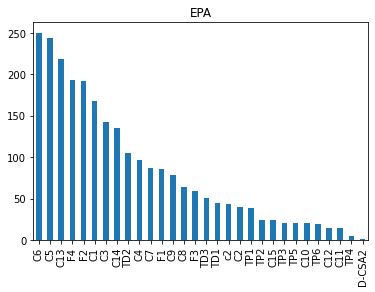

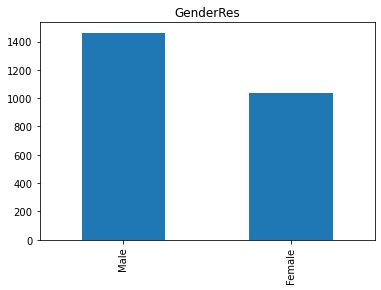

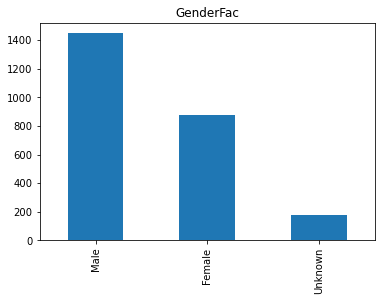

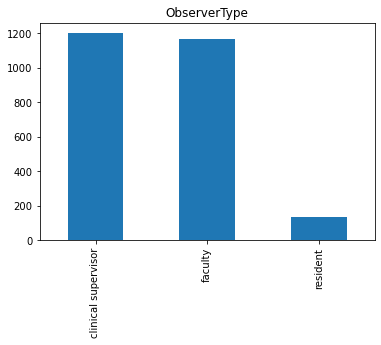

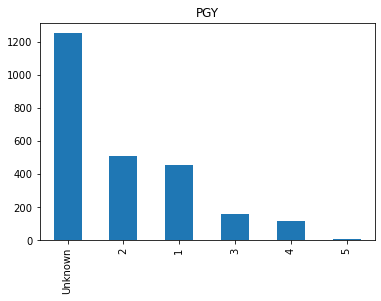

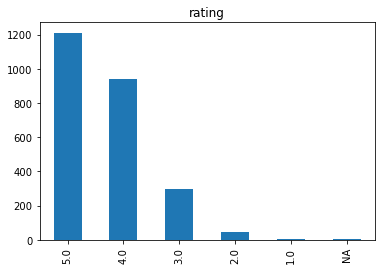

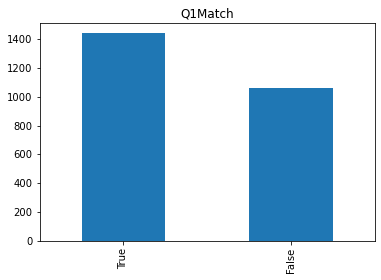

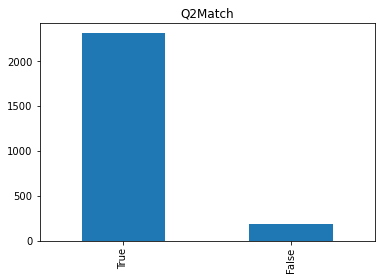

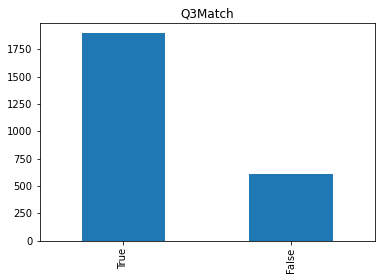

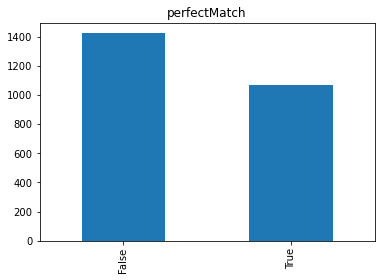

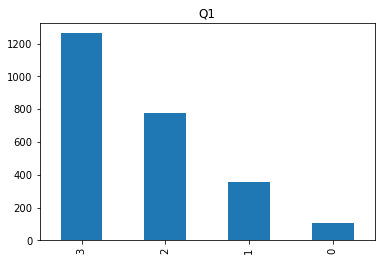

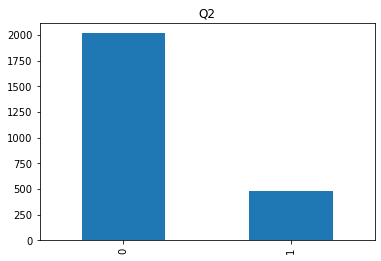

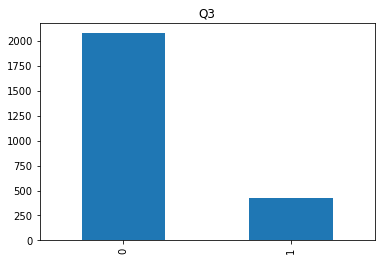

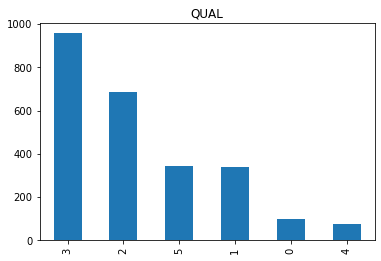

In [11]:
categorical_cols = ['dataSource','EPA','GenderRes','GenderFac', 'ObserverType', 
    'PGY', 'rating', 'Q1Match', 'Q2Match', 'Q3Match', 'perfectMatch', 'Q1', 'Q2', 'Q3', 'QUAL']
for col in categorical_cols:
    plt.figure()
    df[col].fillna('NA').value_counts().plot.bar()
    plt.title(col)